# Statistical estimation and error bars
Data visualization sometimes involves a step of aggregation or estimation, where multiple data points are reduced to a summary statistic such as the mean or median. When showing a summary statistic, it is usually appropriate to add error bars, which provide a visual cue about how well the summary represents the underlying data points.

Several seaborn functions will automatically calculate both summary statistics and the error bars when given a full dataset. This chapter explains how you can control what the error bars show and why you might choose each of the options that seaborn affords.

The error bars around an estimate of central tendency can show one of two general things: either the range of uncertainty about the estimate or the spread of the underlying data around it. These measures are related: given the same sample size, estimates will be more uncertain when data has a broader spread. But uncertainty will decrease as sample sizes grow, whereas spread will not.

In seaborn, there are two approaches for constructing each kind of error bar. One approach is parametric, using a formula that relies on assumptions about the shape of the distribution. The other approach is nonparametric, using only the data that you provide.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

## Measures of data spread
Error bars that represent data spread present a compact display of the distribution, using three numbers where boxplot() would use 5 or more and violinplot() would use a complicated algorithm.

### Standard deviation error bars
Standard deviation error bars are the simplest to explain, because the standard deviation is a familiar statistic. It is the average distance from each data point to the sample mean. By default, errorbar="sd" will draw error bars at +/- 1 sd around the estimate, but the range can be increased by passing a scaling size parameter. Note that, assuming normally-distributed data, ~68% of the data will lie within one standard deviation, ~95% will lie within two, and ~99.7% will lie within three

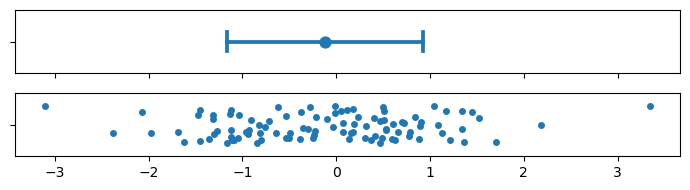

In [3]:
plot_errorbars("sd")

### Percentile interval error bars
Percentile intervals also represent the range where some amount of the data fall, but they do so by computing those percentiles directly from your sample. By default, errorbar="pi" will show a 95% interval, ranging from the 2.5 to the 97.5 percentiles. You can choose a different range by passing a size parameter, e.g., to show the inter-quartile range

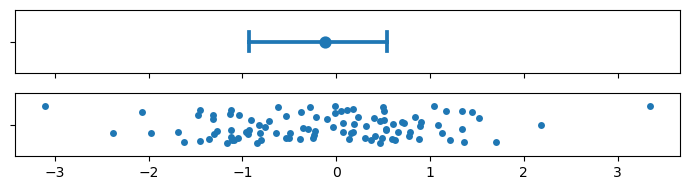

In [4]:
plot_errorbars(("pi", 50))

## Measures of estimate uncertainty
If your data are a random sample from a larger population, then the mean (or other estimate) will be an imperfect measure of the true population average. Error bars that show estimate uncertainty try to represent the range of likely values for the true parameter.

### Standard error bars
The standard error statistic is related to the standard deviation: in fact it is just the standard deviation divided by the square root of the sample size. The default, with errorbar="se", draws an interval +/-1 standard error from the mean

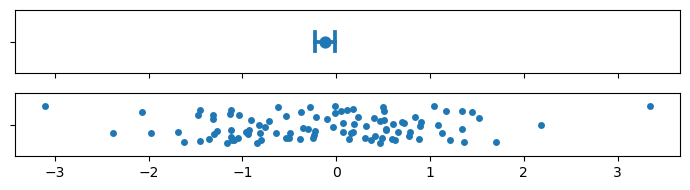

In [5]:
plot_errorbars("se")

## Confidence interval error bars
The nonparametric approach to representing uncertainty uses bootstrapping: a procedure where the dataset is randomly resampled with replacement a number of times, and the estimate is recalculated from each resample. This procedure creates a distribution of statistics approximating the distribution of values that you could have gotten for your estimate if you had a different sample.

The confidence interval is constructed by taking a percentile interval of the bootstrap distribution. By default errorbar="ci" draws a 95% confidence interval

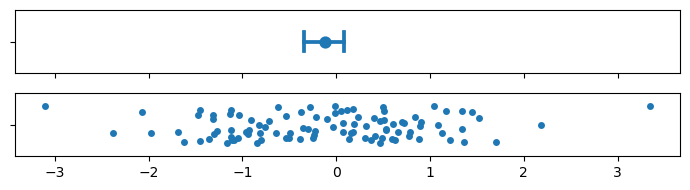

In [6]:
plot_errorbars("ci")

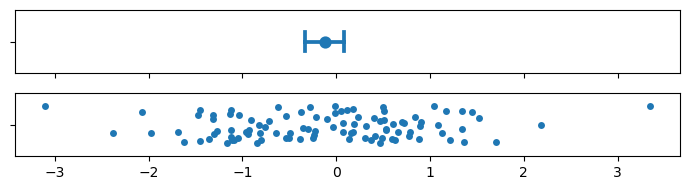

In [7]:
plot_errorbars(("se", 2))

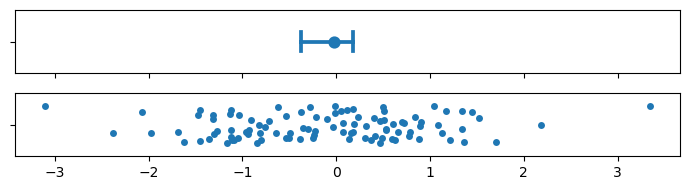

In [8]:
plot_errorbars("ci", estimator="median")

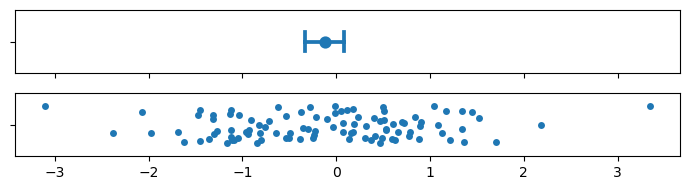

In [9]:
plot_errorbars("ci", n_boot=5000, seed=10)

### Custom error bars
If these recipes are not sufficient, it is also possible to pass a generic function to the errorbar parameter. This function should take a vector and produce a pair of values representing the minimum and maximum points of the interval

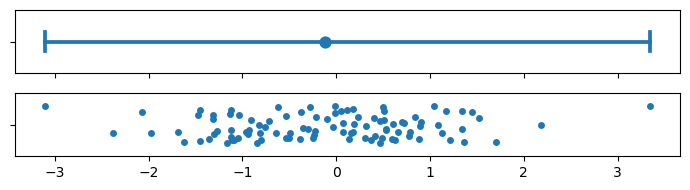

In [10]:
plot_errorbars(lambda x: (x.min(), x.max()))

### Error bars on regression fits
The preceding discussion has focused on error bars shown around parameter estimates for aggregate data. Error bars also arise in seaborn when estimating regression models to visualize relationships. Here, the error bars will be represented by a “band” around the regression line

<Axes: >

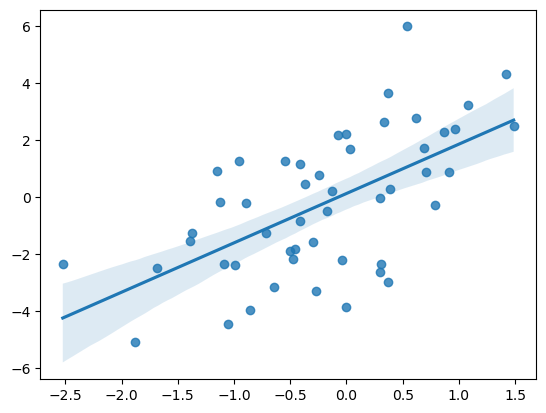

In [11]:
x = np.random.normal(0, 1, 50)
y = x * 2 + np.random.normal(0, 2, size=x.size)
sns.regplot(x=x, y=y)